### Task 1.B

In [465]:
# variables for the number of total topics, chosen topics, studied topics and a list of 69 topics

import random

nr_total_topics = 69
nr_chosen_topics= 5
nr_studied_topics = 20

topics = list(range(1, nr_total_topics + 1))

In [470]:
# use different number of trials and run the experiments to compute the probability of passing the exam
trials_list = [10, 100, 1000, 10000, 100000, 1000000]
probs = []

for trial in trials_list:
    successes = 0
    for j in range(trial):
        random.seed(j)
        chosen_topics = random.sample(topics, nr_chosen_topics)
        studied_topics = random.sample(topics, nr_studied_topics)
        result = [True for el in studied_topics if el in chosen_topics]
        if len(result) > 0:
            successes += 1
        
    probs.append(successes/trial)

In [471]:
# computed probabilities for each number of trials
probs

[0.8, 0.84, 0.823, 0.8272, 0.83109, 0.83087]

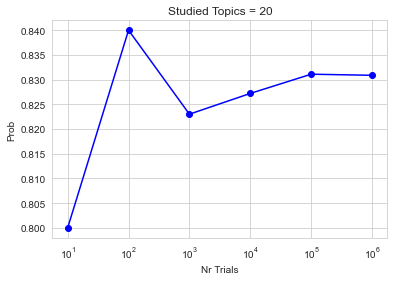

In [480]:
# plot the nr of trials against probabilities

plt.plot(trials_list, probs, color = "blue", marker = "o" )
plt.xlabel('Nr Trials')
plt.ylabel('Prob')
plt.title('Studied Topics = 20')
plt.xscale('log')
plt.show()

* For lower number of experiments (trials) there is a high variance of the computed probabilities. To have a more reliable result we must run the experiment much more times for example more than 100000. As a result the probability of passing the exam converges to 0.83.
* Theoretical Probability = 0.83

In [481]:
nr_studied_topics = 15
trials_list = [10, 100, 1000, 10000, 100000, 1000000]
probs = []

for trial in trials_list:
    successes = 0
    for j in range(trial):
        random.seed(j)
        chosen_topics = random.sample(topics, nr_chosen_topics)
        studied_topics = random.sample(topics, nr_studied_topics)
        result = [True for el in studied_topics if el in chosen_topics]
        if len(result) > 0:
            successes += 1
        
    probs.append(successes/trial)

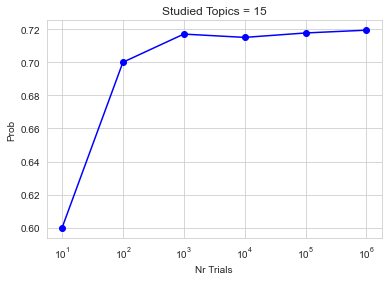

In [482]:
# plot the nr of trials against probabilities

plt.plot(trials_list, probs, color = "blue", marker = "o" )
plt.xlabel('Nr Trials')
plt.ylabel('Prob')
plt.title('Studied Topics = 15')
plt.xscale('log')
plt.show()

Theoretical Probability = 0.72

In [474]:
prob_topic = (nr_chosen_topics * nr_studied_topics) / (pow(nr_total_topics, 2))
prob_topic

0.021003990758244065

In [476]:
def fac(x):
    f = 1
    for i in range(1, x+1):
        f = f * i
        
    return f

In [478]:
result_prob = 0
nr_total_topics = 69

for x in range(1, nr_total_topics + 1):
    if x%2==1:        
        result_prob += pow(prob_topic, x) * fac(nr_total_topics) / (fac(x) * fac(nr_total_topics - x))
    else:
        result_prob -= pow(prob_topic, x) * fac(nr_total_topics) / (fac(x) * fac(nr_total_topics - x))
    

In [479]:
result_prob

0.7688554911699496

### Task 2

In [483]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [484]:
df = pd.read_csv('skydata.csv')

In [485]:
df.head()

dec         u  redshift         z         r          ra   run  \
0   2.803170  19.35065  0.142265  16.32664  17.04886  182.898466  1458   
1  23.891666  17.57148  0.000032  15.88743  16.04065  270.240850  4832   
2  14.323357  18.30611  0.073976  15.00599  15.73859  138.913885  5935   
3   6.157200  19.52862  0.040765  16.13952  16.88640  159.998722  2986   
4  -0.395033  18.91353  0.000084  17.14535  17.36865  181.624546  6793   

             specobjid  field  plate  camcol         g                objid  \
0   583309923396381000    388    518       4  17.89648  1237651736831980000   
1  2471445199432210000    126   2195       3  16.38217  1237666227497600000   
2  2742700762298610000    151   2436       4  16.52253  1237670965385040000   
3  1125959874568550000    276   1000       2  17.74360  1237658298460930000   
4   363748710133295000    140    323       3  17.80134  1237674649929380000   

    class  fiberid  rerun         i    mjd  
0    STAR      341    301  16.63305  52282  
1  GALAXY      345    301  15.92649  54234  
2    STAR       31    301  15.32356  54054  
3    STAR      218    301  16.48322  52643  
4  GALAXY      302    301  17.21479  51615

In [486]:
# nr of rows and columns
df.shape

(80000, 18)

In [345]:
# general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        80000 non-null  float64
 1   u          80000 non-null  float64
 2   redshift   80000 non-null  float64
 3   z          80000 non-null  float64
 4   r          80000 non-null  float64
 5   ra         80000 non-null  float64
 6   run        80000 non-null  int64  
 7   specobjid  80000 non-null  uint64 
 8   field      80000 non-null  int64  
 9   plate      80000 non-null  int64  
 10  camcol     80000 non-null  int64  
 11  g          80000 non-null  float64
 12  objid      80000 non-null  int64  
 13  class      80000 non-null  object 
 14  fiberid    80000 non-null  int64  
 15  rerun      80000 non-null  int64  
 16  i          80000 non-null  float64
 17  mjd        80000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 11.0+ MB


In [346]:
# Check for missing values.
df.isna().sum()

dec          0
u            0
redshift     0
z            0
r            0
ra           0
run          0
specobjid    0
field        0
plate        0
camcol       0
g            0
objid        0
class        0
fiberid      0
rerun        0
i            0
mjd          0
dtype: int64

* There are no missing values.

In [347]:
# descriptive statistics for each feature
df.describe()

dec             u      redshift             z             r  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      24.956199     18.599217      0.044789     16.249336     16.688952   
std       20.684056      0.850213      0.053003      1.144420      1.013888   
min      -19.495456     10.611810     -0.004136      8.947795      9.005167   
25%        6.592120     18.151283     -0.000033     15.533245     16.112177   
50%       23.710118     18.836250      0.033506     16.264470     16.754960   
75%       40.306610     19.253073      0.078770     16.994713     17.392215   
max       84.490494     19.599950      1.945427     29.383740     31.990100   

                 ra           run     specobjid         field         plate  \
count  80000.000000  80000.000000  8.000000e+04  80000.000000  80000.000000   
mean     177.743131   3959.174013  2.752467e+18    187.312775   2444.599575   
std       77.896889   1673.864207  2.247970e+18    141.263033   1996.584854   
min        0.013061    109.000000  2.994897e+17     11.000000    266.000000   
25%      135.892460   2826.000000  1.334297e+18     85.000000   1185.000000   
50%      180.537028   3900.000000  2.319509e+18    153.000000   2060.000000   
75%      224.576979   5060.000000  3.221323e+18    249.000000   2861.000000   
max      359.973933   8162.000000  1.314852e+19    982.000000  11678.000000   

             camcol             g         objid       fiberid    rerun  \
count  80000.000000  80000.000000  8.000000e+04  80000.000000  80000.0   
mean       3.275537     17.255286  1.237662e+18    336.434625    301.0   
std        1.623022      0.906773  7.189191e+12    212.623680      0.0   
min        1.000000      9.988000  1.237646e+18      1.000000    301.0   
25%        2.000000     16.763295  1.237658e+18    158.000000    301.0   
50%        3.000000     17.414850  1.237662e+18    324.000000    301.0   
75%        5.000000     17.907175  1.237667e+18    496.000000    301.0   
max        6.000000     19.996050  1.237681e+18   1000.000000    301.0   

                  i           mjd  
count  80000.000000  80000.000000  
mean      16.417453  53832.966075  
std        1.074750   1441.947194  
min        8.848403  51608.000000  
25%       15.781940  52731.000000  
50%       16.453590  53712.000000  
75%       17.129413  54567.000000  
max       32.101780  58543.000000

<AxesSubplot:xlabel='class', ylabel='count'>

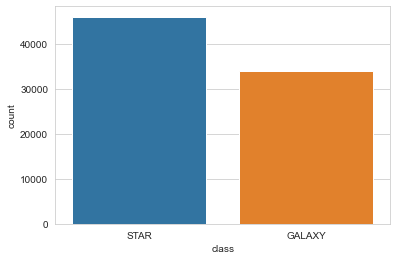

In [348]:
# check for imbalanced data
sns.set_style('whitegrid')
sns.countplot(x='class',data=df)

In [349]:
df['class'].value_counts() / len(df) * 100

STAR      57.505
GALAXY    42.495
Name: class, dtype: float64

In [491]:
# drop features which are not relevant for prediction
# objid, specobjid, fiberid are identification numbers

df.drop(['objid', 'specobjid', 'fiberid'], axis=1, inplace=True)

In [492]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] # != dtype != 'B' for bool datatype

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  14
['dec', 'u', 'redshift', 'z', 'r', 'ra', 'run', 'field', 'plate', 'camcol', 'g', 'rerun', 'i', 'mjd']


In [493]:
# Discrete features

discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))
print(discrete_features)

Discrete Variables Count: 2
['camcol', 'rerun']


In [494]:
df['camcol'].unique()

array([4, 3, 2, 6, 5, 1], dtype=int64)

In [495]:
df['rerun'].unique()

array([301], dtype=int64)

In [496]:
df.drop(['rerun'], axis=1, inplace=True)

In [497]:
discrete_features.remove('rerun')

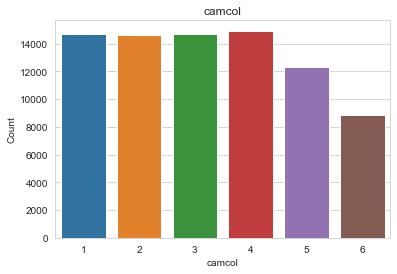

In [498]:
# Plot the distribution of discrete features (camcol)
sns.set_style('whitegrid')

for feature in discrete_features:
    data=df.copy()
    
    sns.countplot(x=feature, data=df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [358]:
# Encode the target feature
df['class'] = df['class'].map({'STAR' : 0, 'GALAXY' : 1})

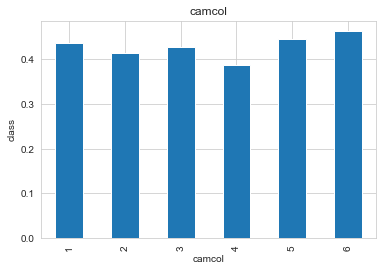

In [359]:
# Plot the relationship of discrete features (camcol) and target (class)

for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)['class'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.title(feature)
    plt.show()

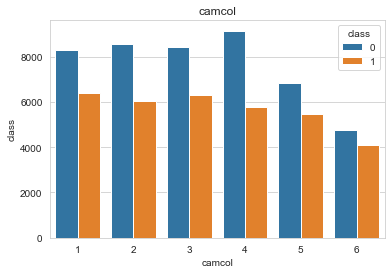

In [360]:
sns.set_style('whitegrid')

for feature in discrete_features:
    data=df.copy()
    
    sns.countplot(x=feature,hue='class' ,data=data)
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.title(feature)
    plt.show()

In [361]:
# Continuous Features

continuous_feature=[feature for feature in numerical_features if feature not in discrete_features + ['rerun']]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 14
['dec', 'u', 'redshift', 'z', 'r', 'ra', 'run', 'specobjid', 'field', 'plate', 'g', 'fiberid', 'i', 'mjd']


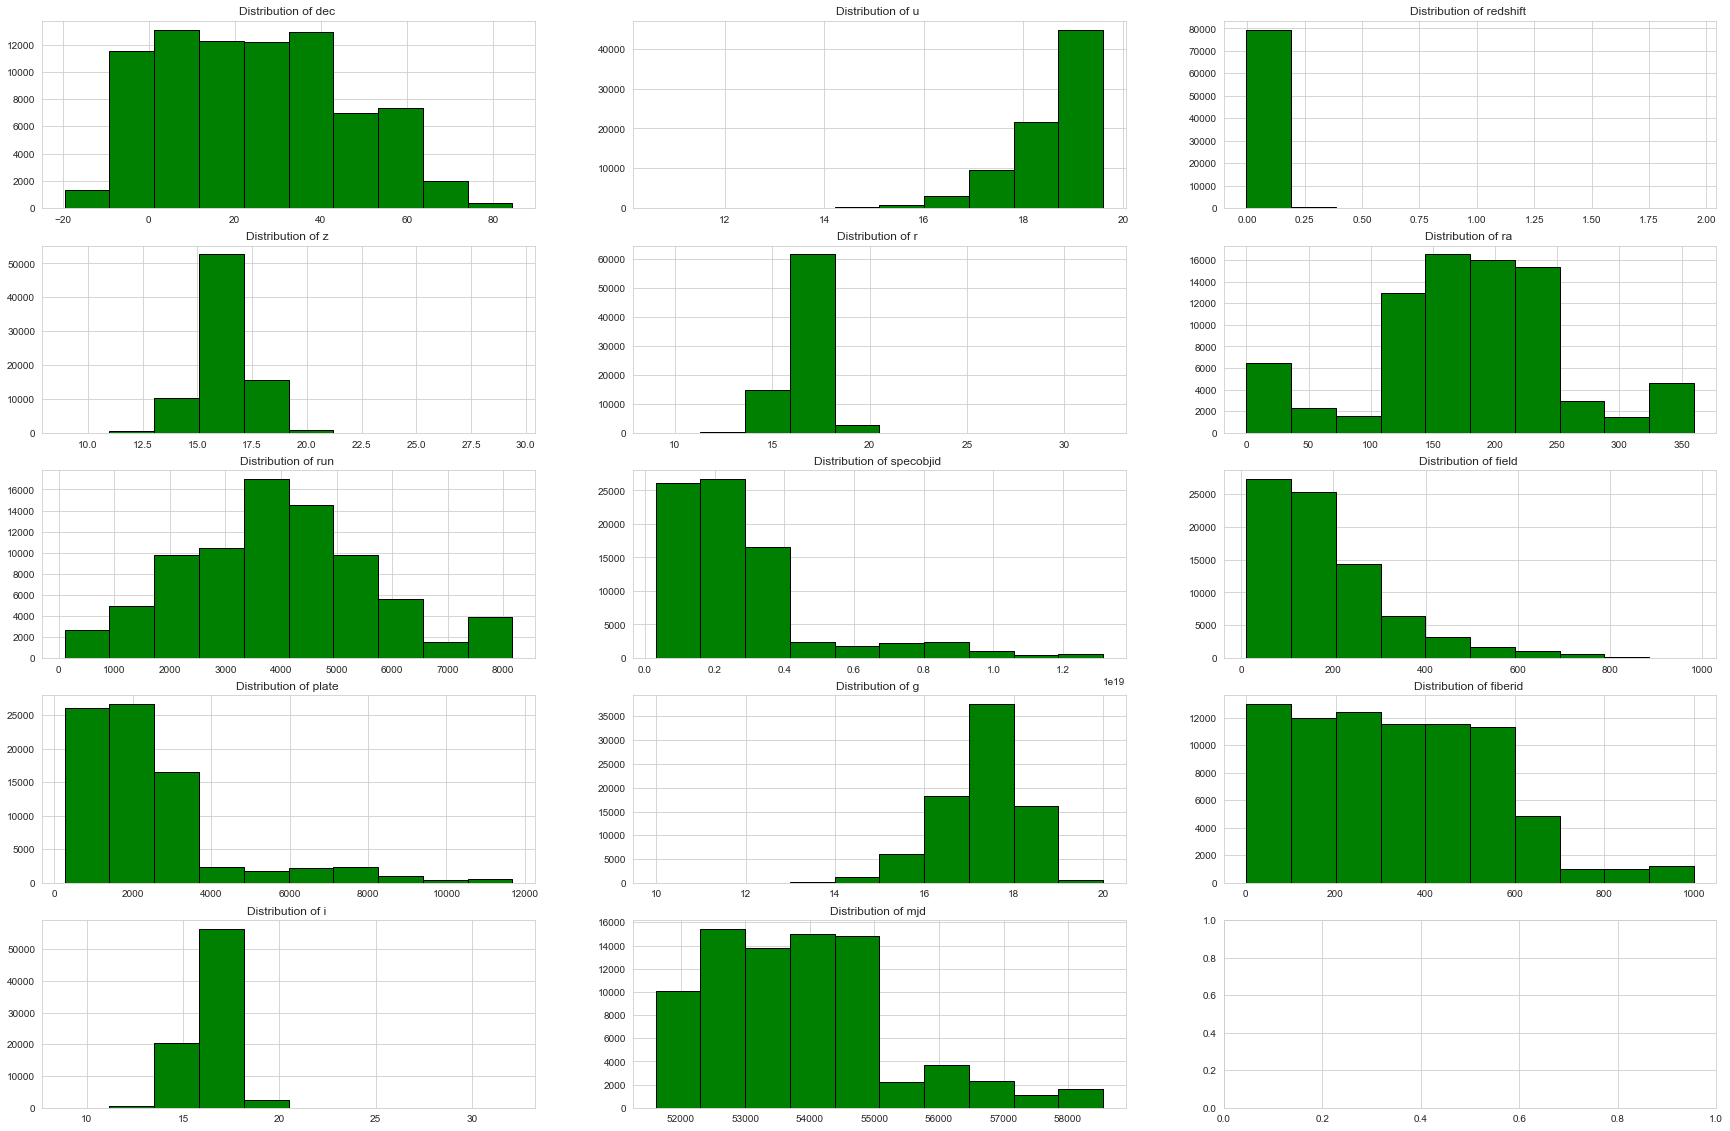

In [362]:
# Plot distribution of continuous features using histograms

fig,ax = plt.subplots(5, 3,figsize = (30,20))

w = 0
for i in range(5):
    for j in range(3):
        if w == len(continuous_feature):
            break
        ax[i, j].hist(df[continuous_feature[w]], color = 'green', edgecolor = 'black')
        ax[i, j].set_title(f'Distribution of {continuous_feature[w]} ')
        w += 1
        
plt.show()

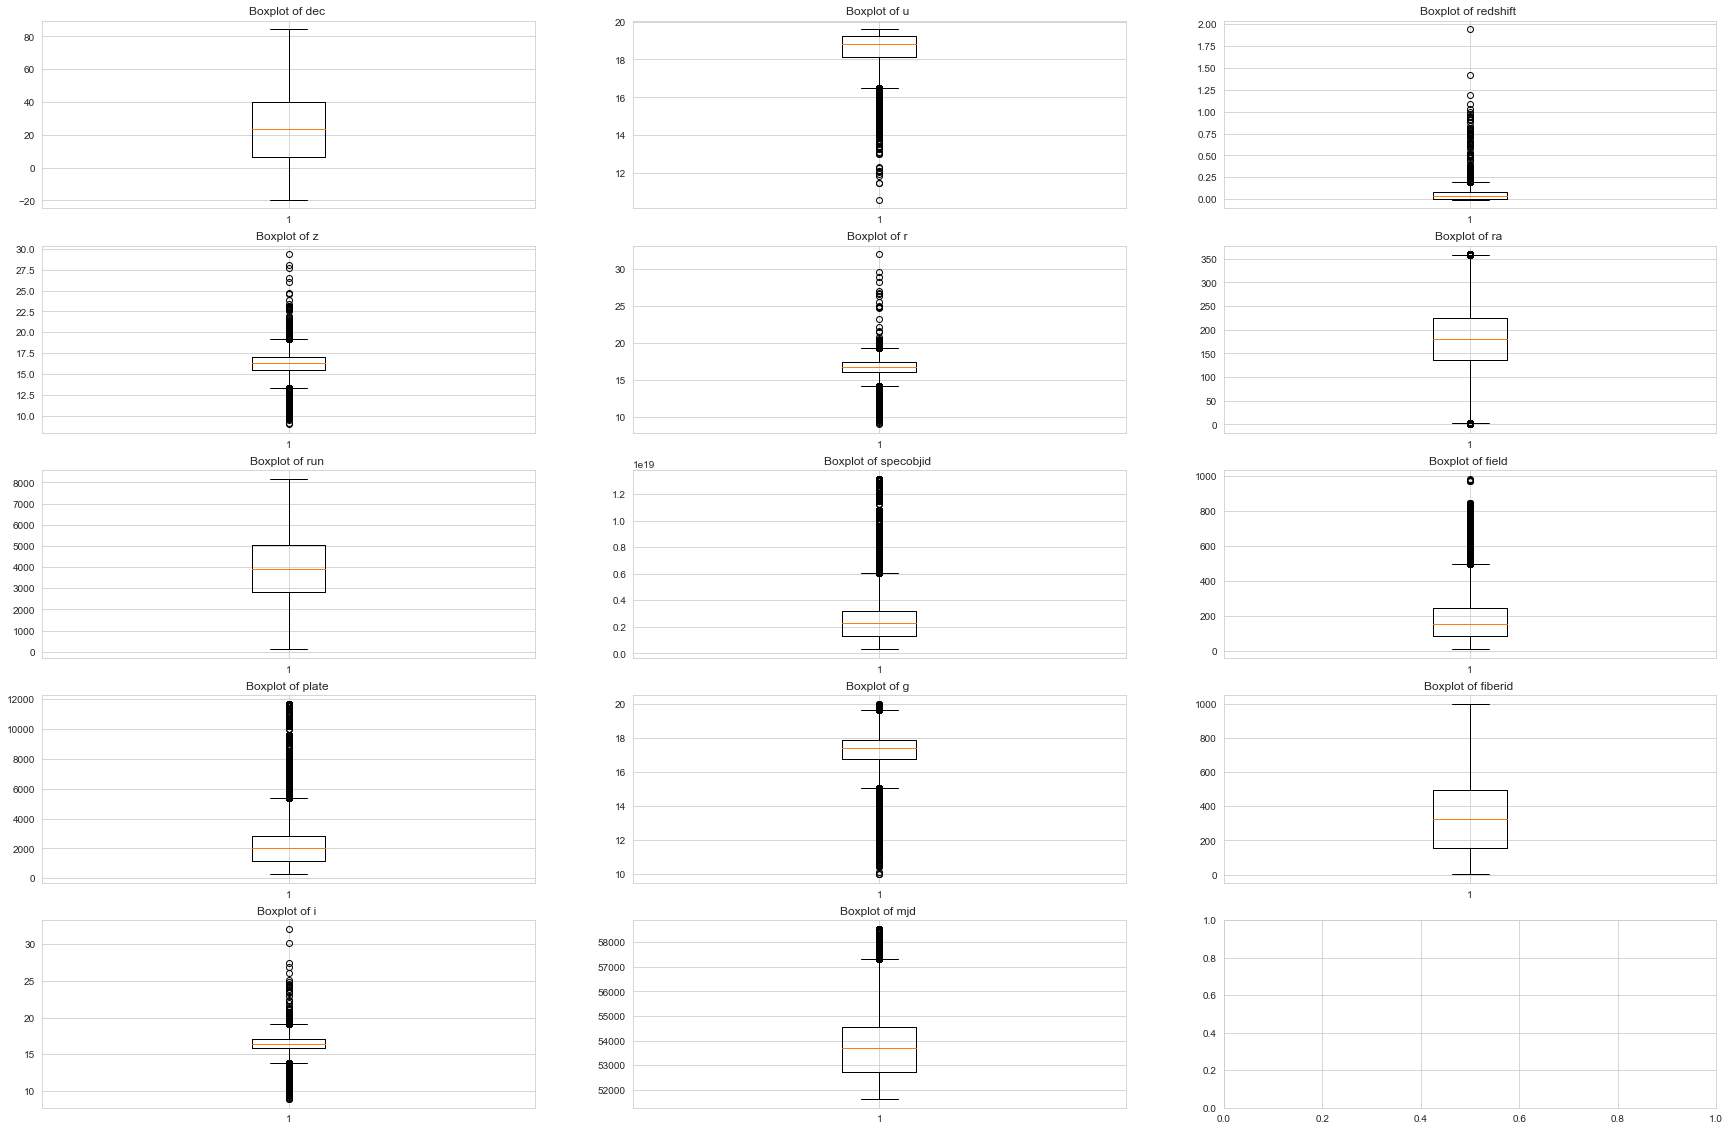

In [364]:
# Plot the distribution of continuous features using boxplots

fig,ax = plt.subplots(5, 3,figsize = (30,20))

w = 0
for i in range(5):
    for j in range(3):
        if w == len(continuous_feature):
            break
        
        ax[i, j].boxplot(df[continuous_feature[w]])
        ax[i, j].set_title(f'Boxplot of {continuous_feature[w]} ')
        w += 1
        
plt.show()

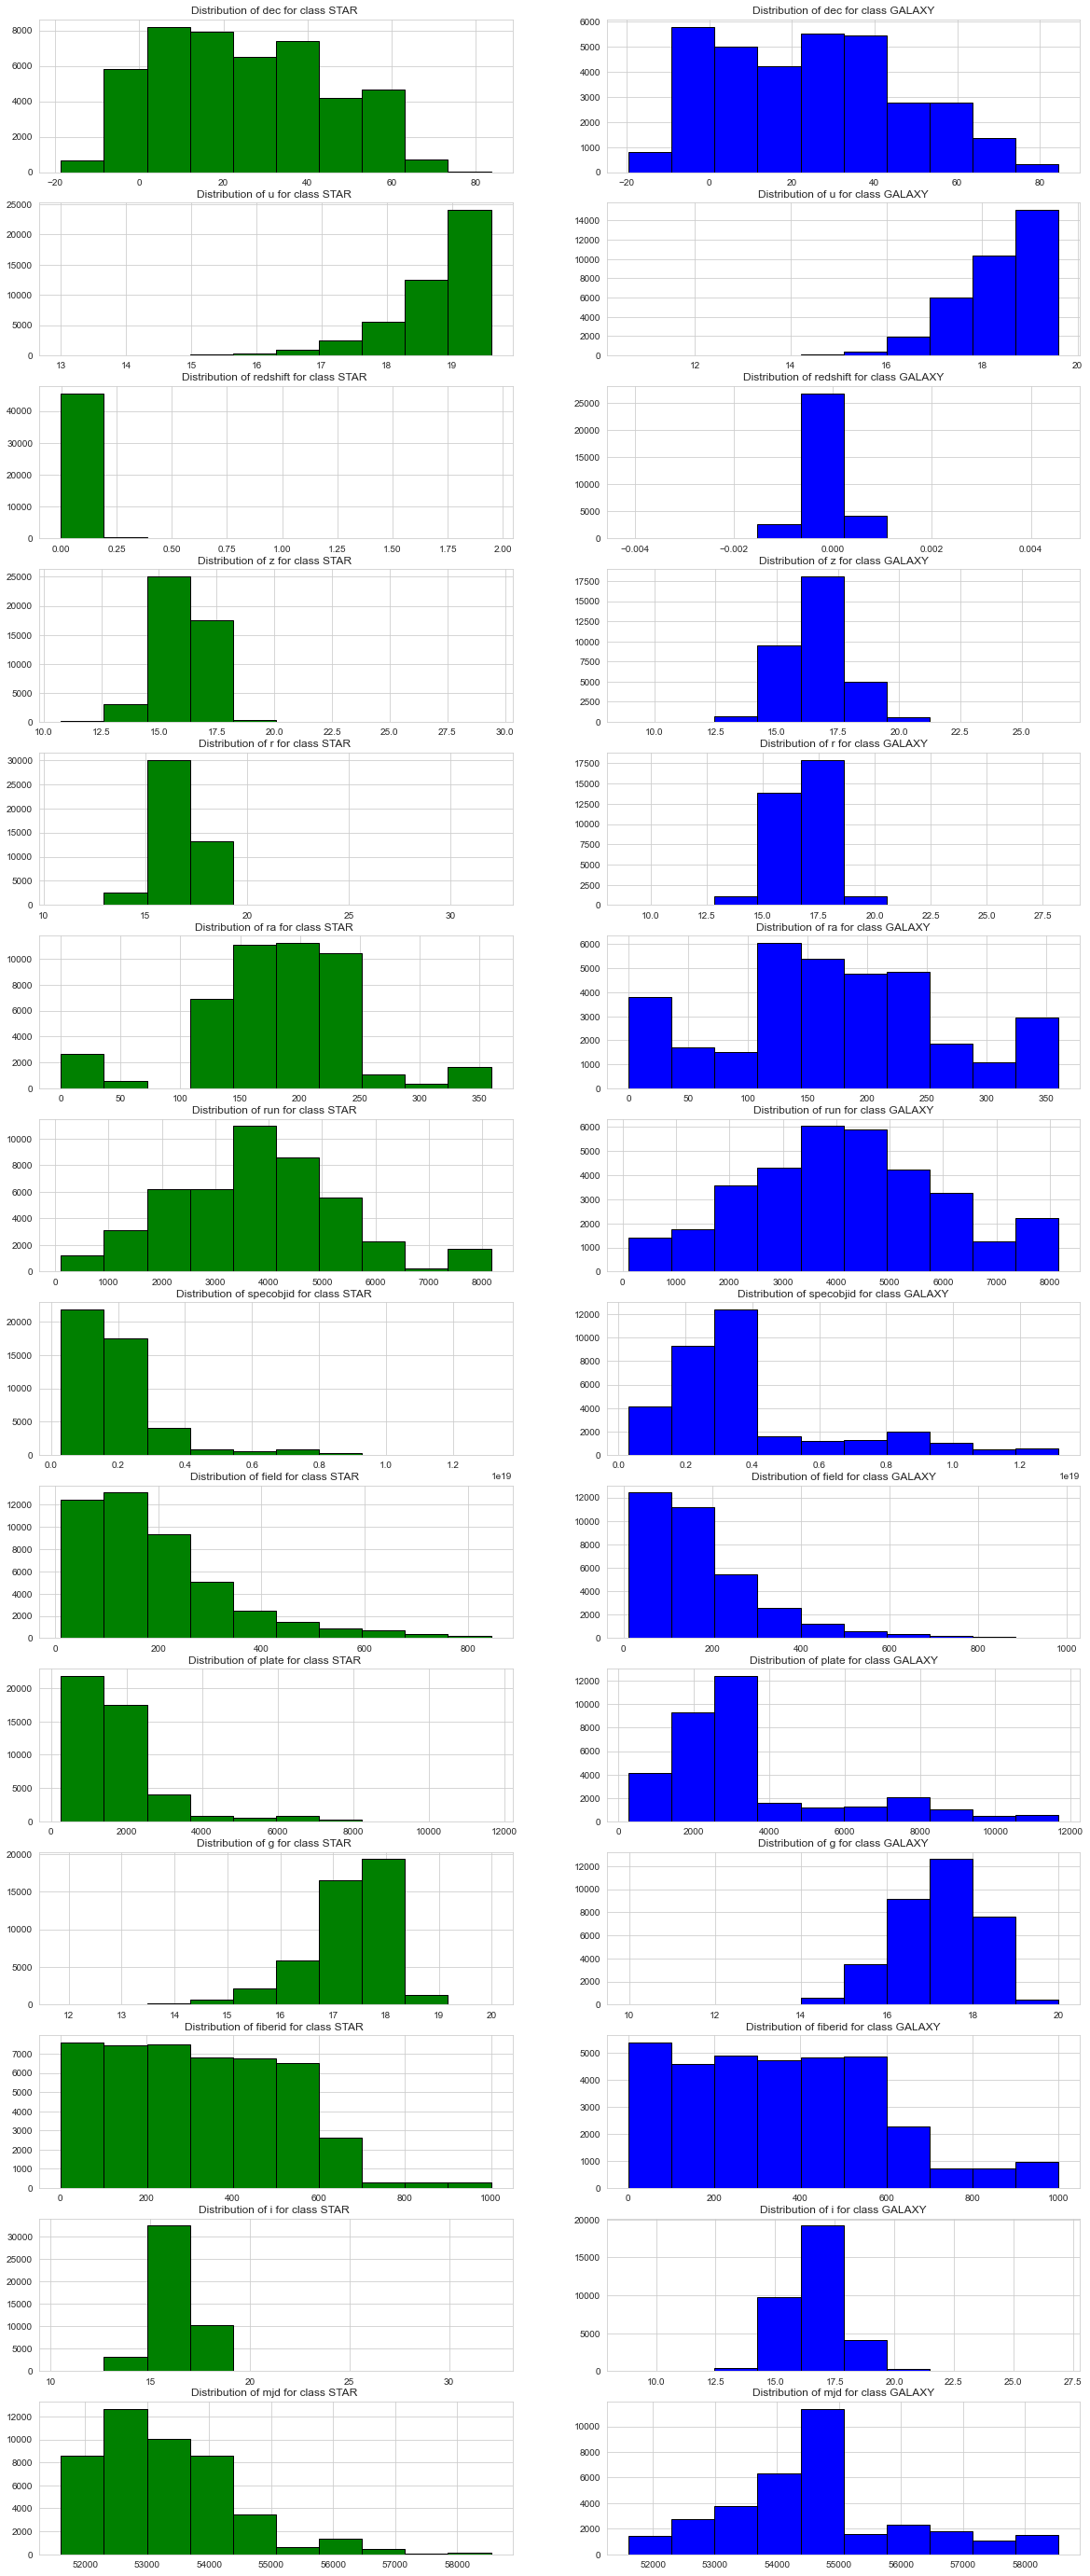

In [365]:
# Plot the relationship of continuous features against the target

fig,ax = plt.subplots(len(continuous_feature), 2,figsize = (20,50))
colors = ['green', 'blue']

for i in range(len(continuous_feature)):
    ax[i, 0].hist([df[df['class']==0][continuous_feature[i]]], color = colors[0], edgecolor = 'black')
    ax[i, 0].set_title(f'Distribution of {continuous_feature[i]} for class STAR ')
    
    ax[i, 1].hist([df[df['class']==1][continuous_feature[i]]], color = colors[1], edgecolor = 'black')
    ax[i, 1].set_title(f'Distribution of {continuous_feature[i]} for class GALAXY')
    
plt.show()


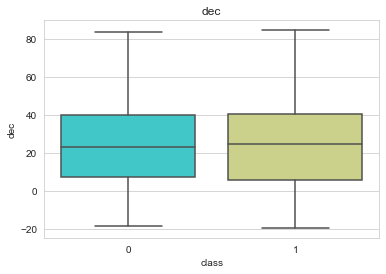

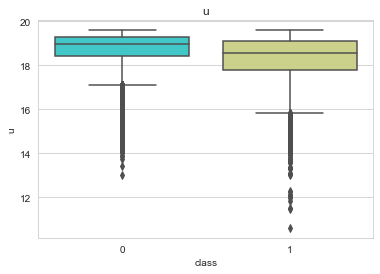

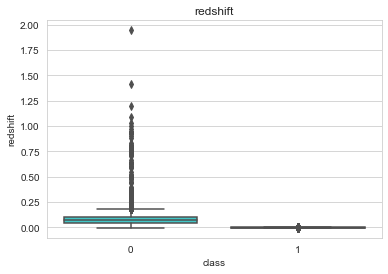

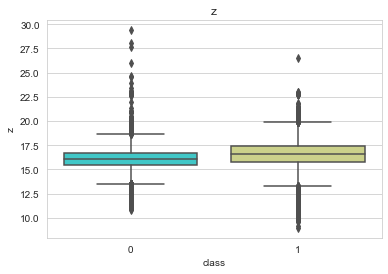

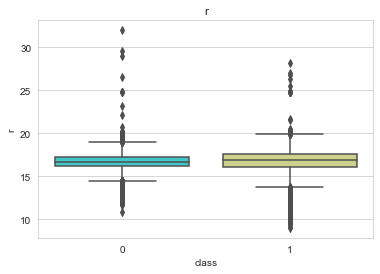

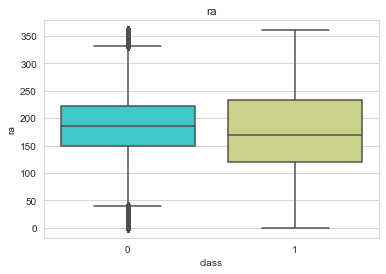

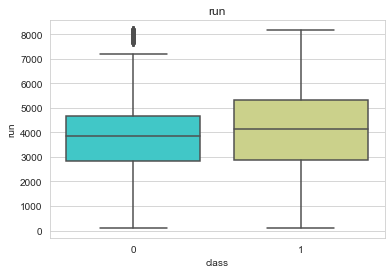

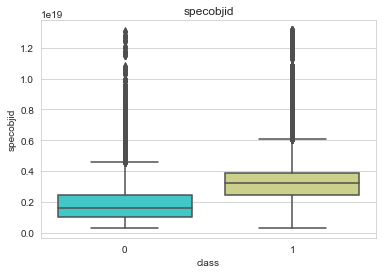

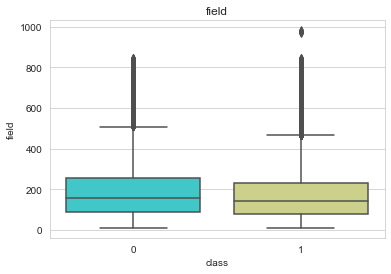

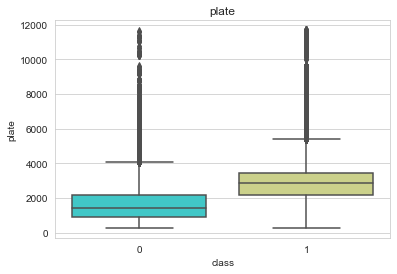

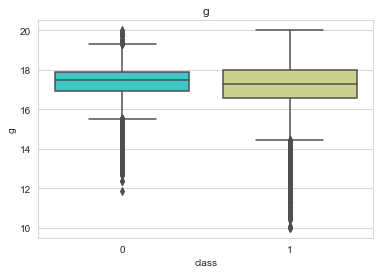

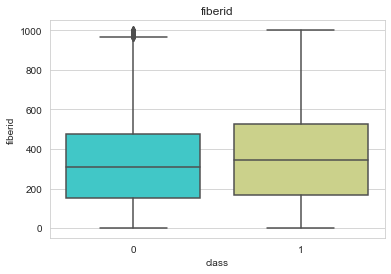

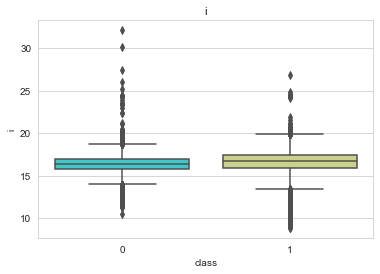

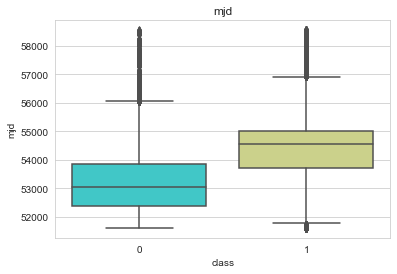

In [323]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(x='class', y=feature, data=data,palette='rainbow')
    plt.xlabel('class')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


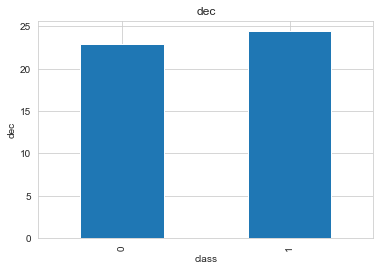

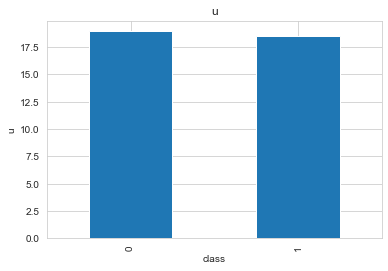

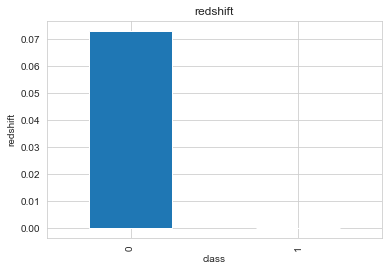

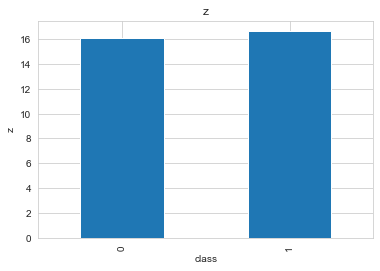

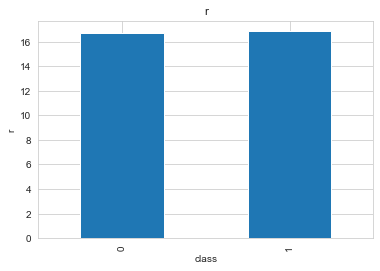

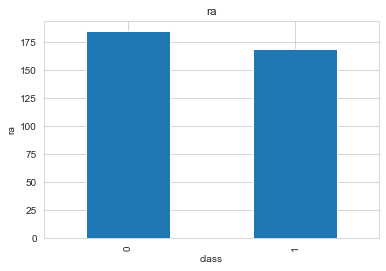

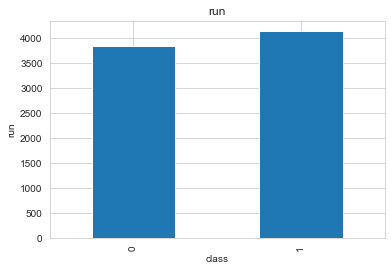

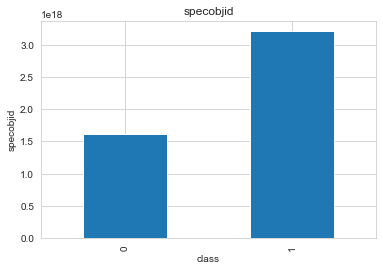

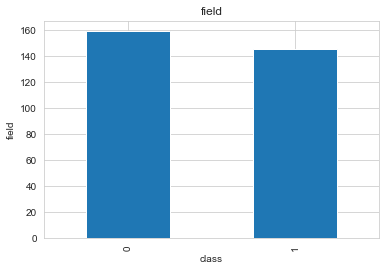

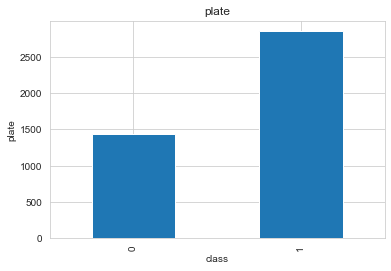

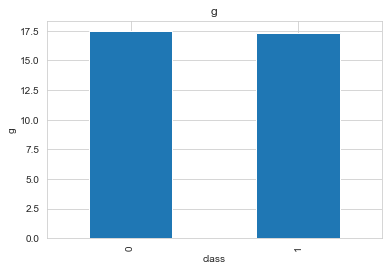

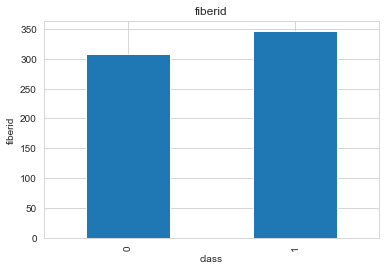

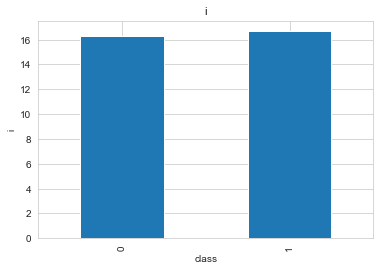

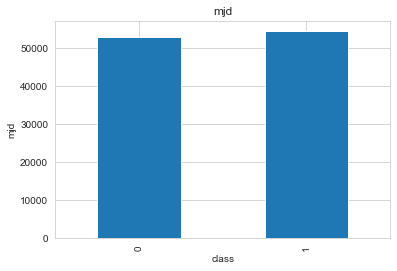

In [324]:
for feature in continuous_feature:
    data=df.copy()
    data.groupby('class')[feature].median().plot.bar()
    plt.xlabel('class')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

<Figure size 2160x2160 with 0 Axes>

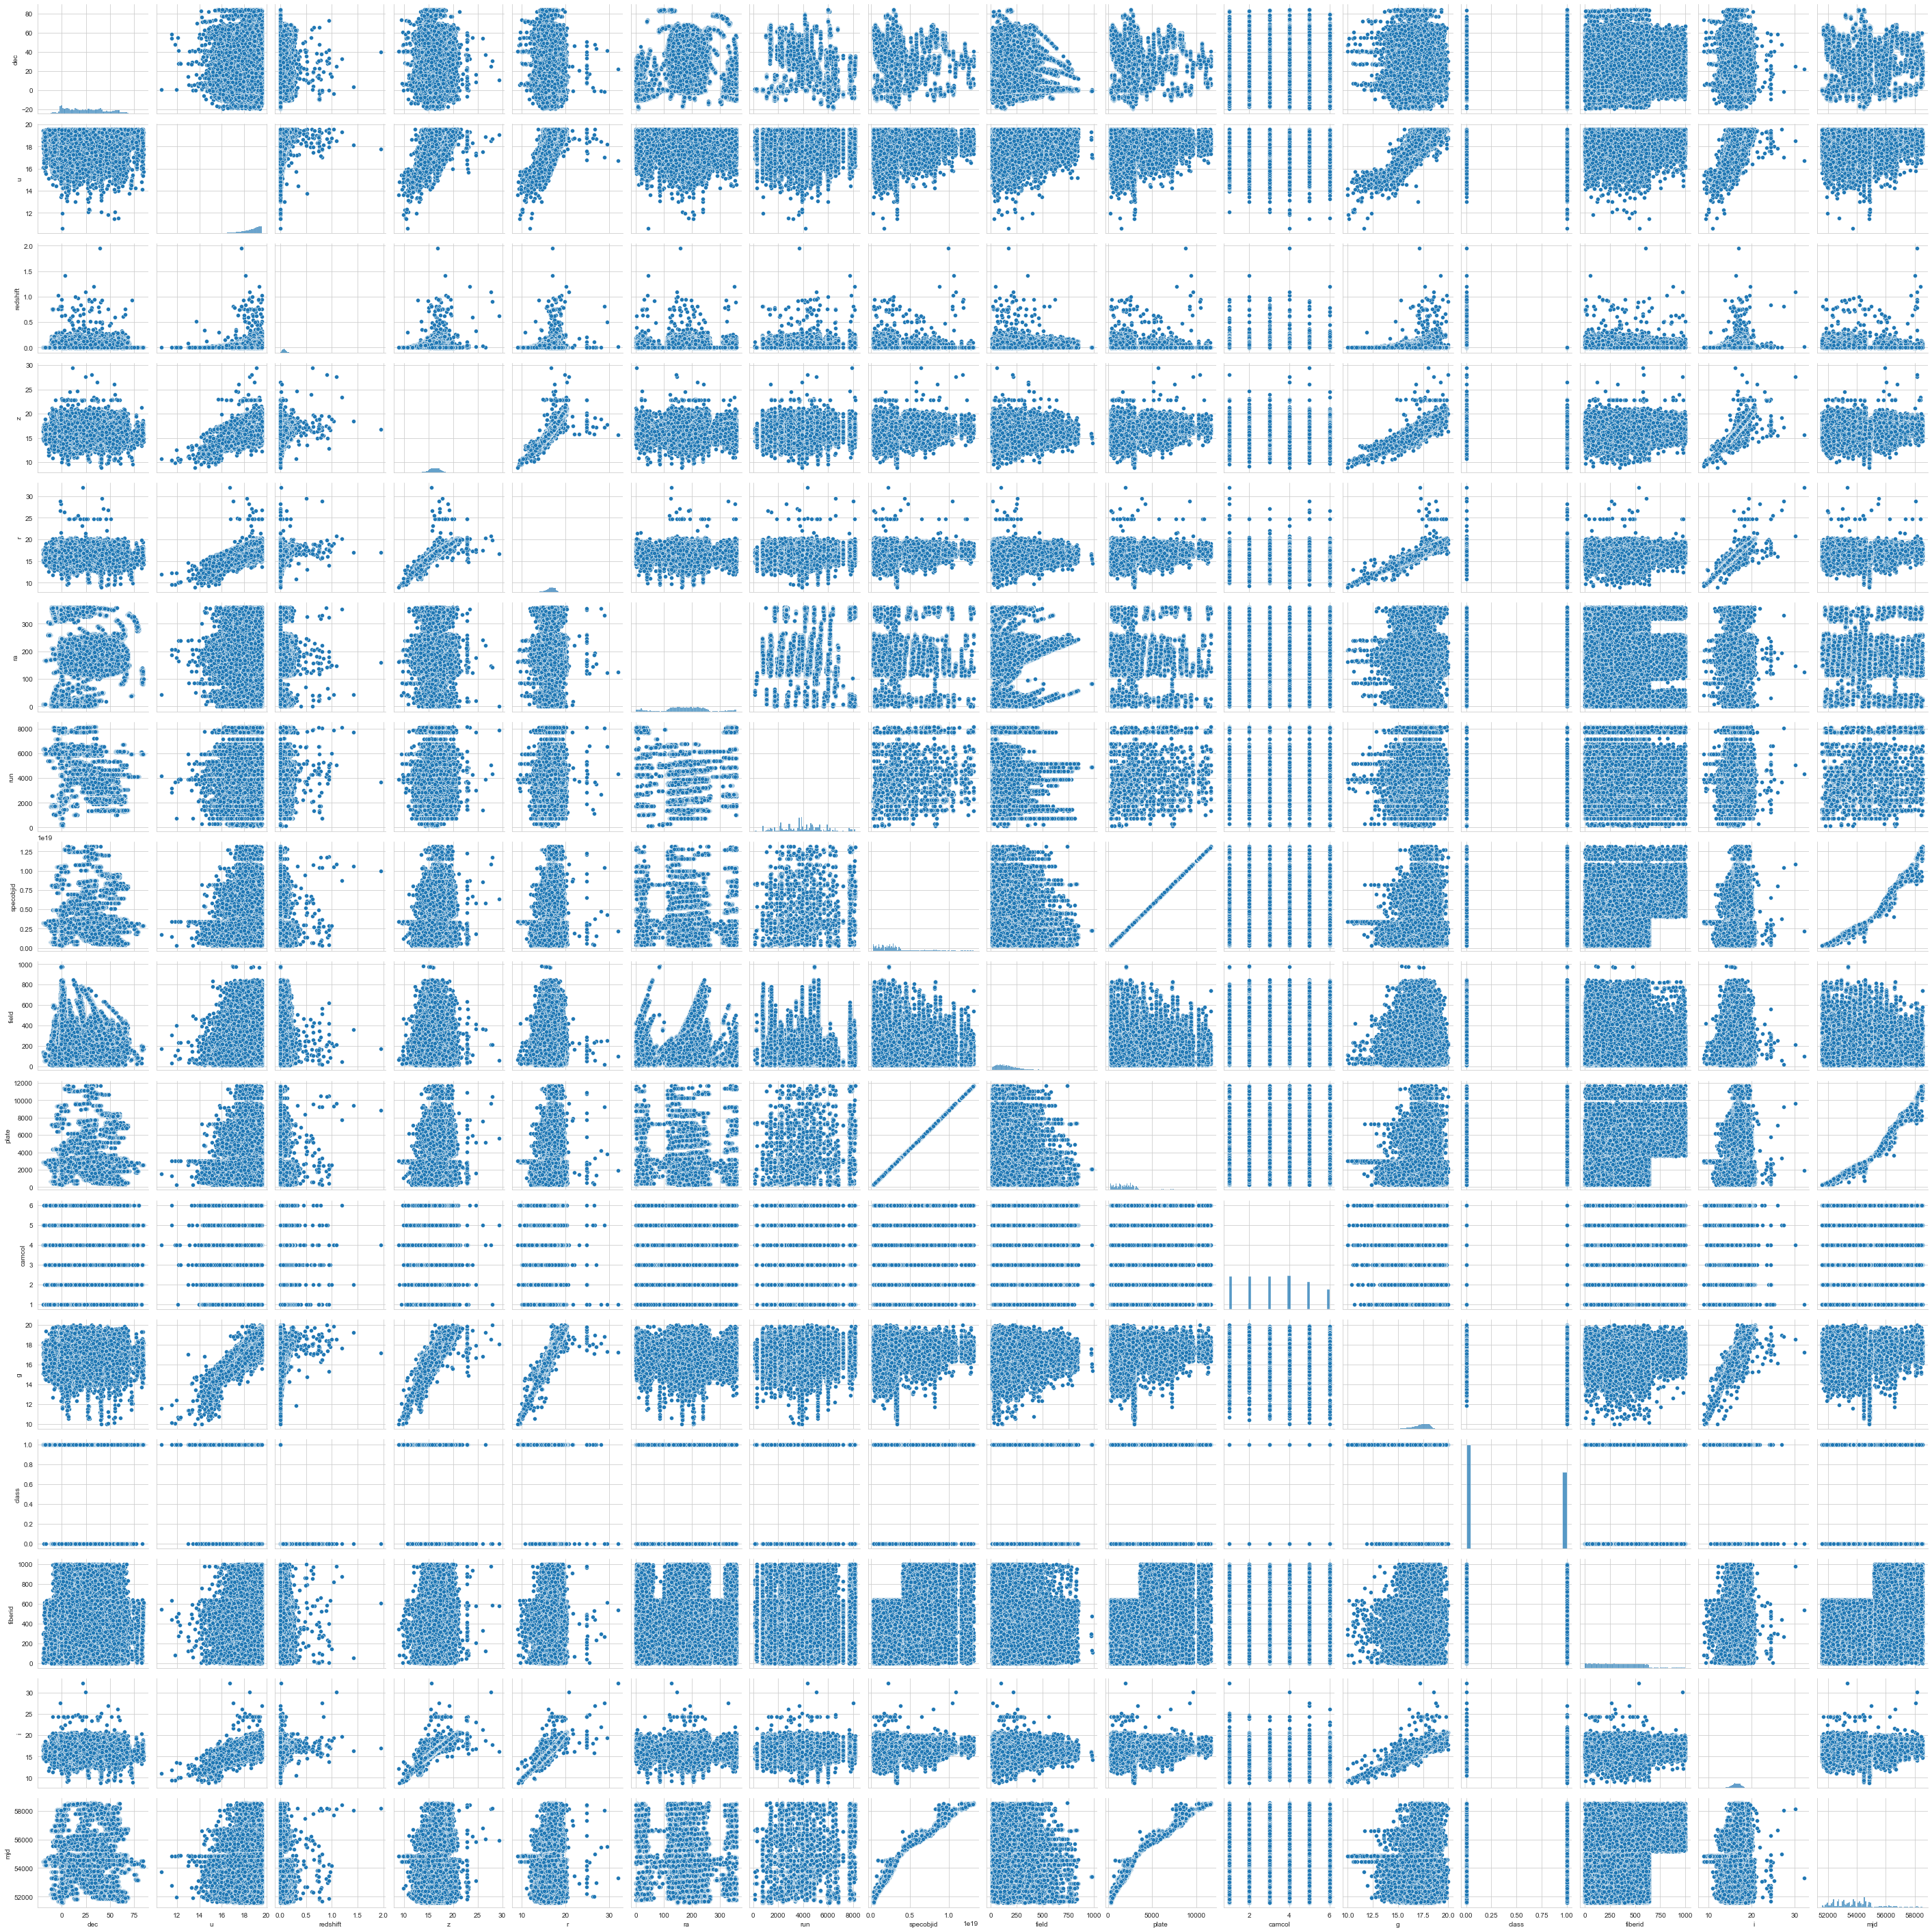

In [325]:
plt.figure(figsize=(30,30))
sns.pairplot(df)

<AxesSubplot:>

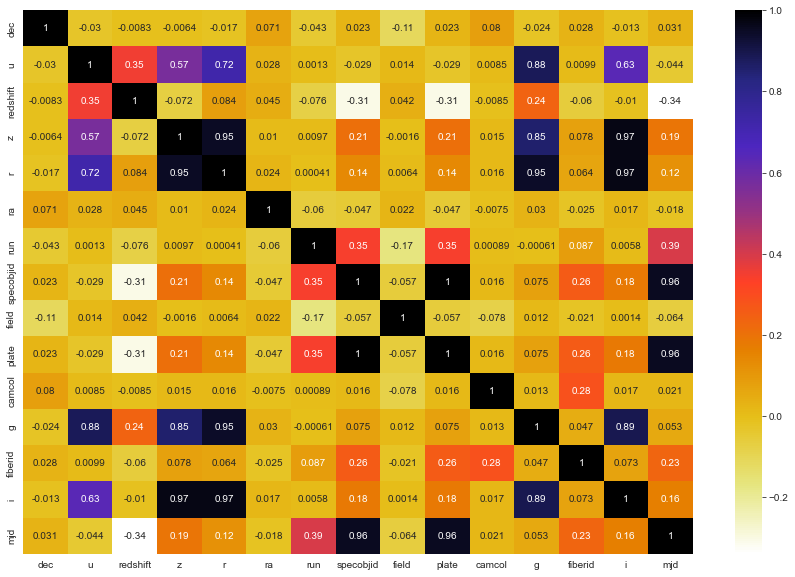

In [326]:
plt.figure(figsize=(15, 10))
cor = df.drop(['class'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

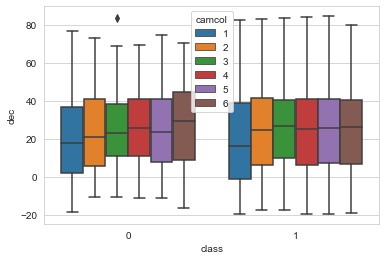

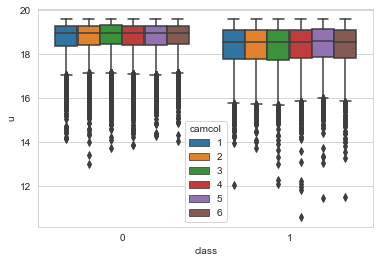

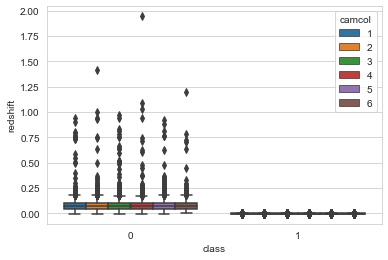

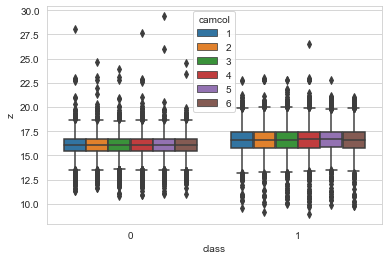

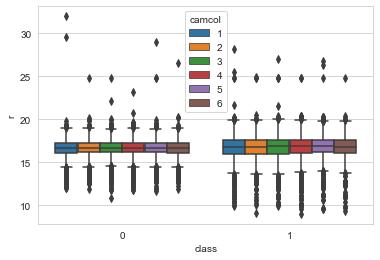

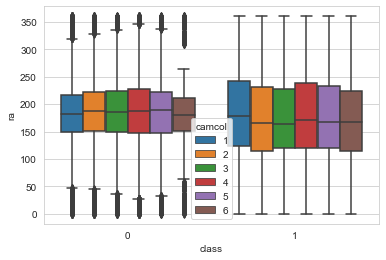

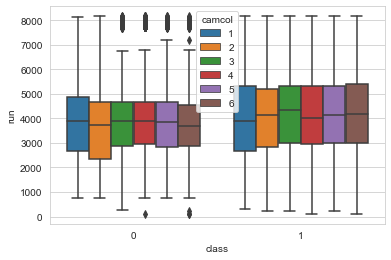

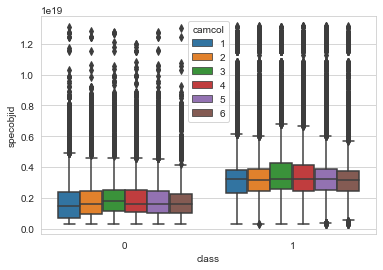

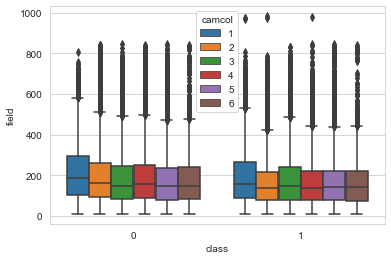

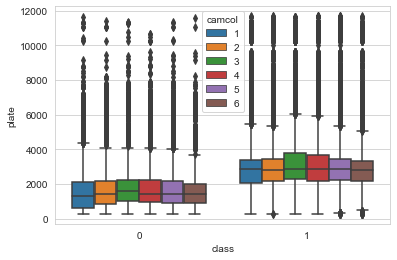

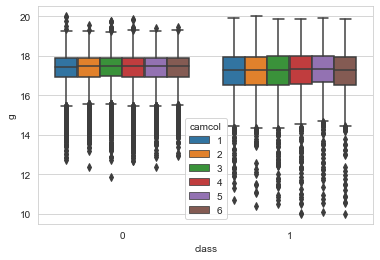

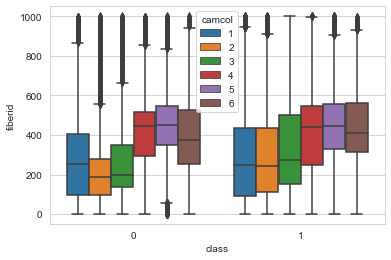

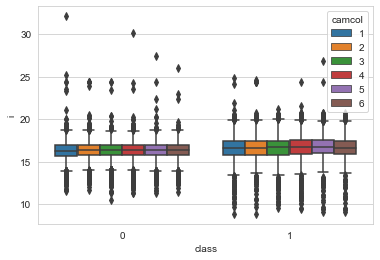

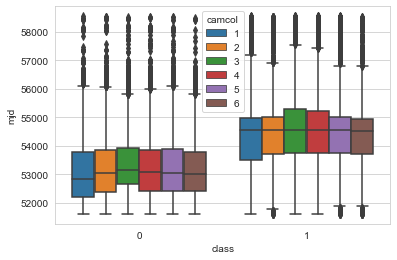

In [327]:
#plt.figure(figsize=(13,7))

for el in continuous_feature:
    sns.boxplot(x='class', y=el, hue='camcol', data=df)
    plt.show()

In [ ]:
# df_log = df.copy()
# conf = continuous_feature

# for feature in conf.remove('redshift'):
#     if 0 in df_log[feature].unique():
#         df_log[feature] = df_log[feature] + pow(10, -5)
#     else:
#         df_log[feature]=np.log(df_log[feature])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [142]:
# from sklearn.model_selection import train_test_split

# X = df_log.drop(['class'], axis=1)
# y = df_log['class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

<Figure size 576x576 with 0 Axes>

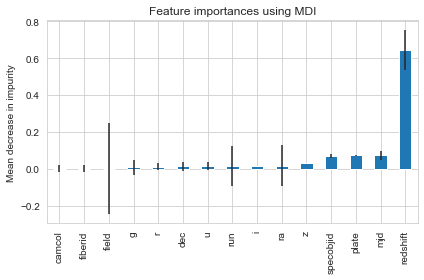

In [269]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X_train.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=True).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [270]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [271]:
from sklearn.metrics import classification_report

pred_test = log.predict(X_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11501
           1       0.42      1.00      0.60      8499

    accuracy                           0.42     20000
   macro avg       0.21      0.50      0.30     20000
weighted avg       0.18      0.42      0.25     20000



C:\Users\loriz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loriz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loriz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


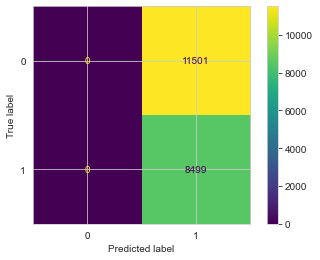

In [272]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log, X_test, y_test)

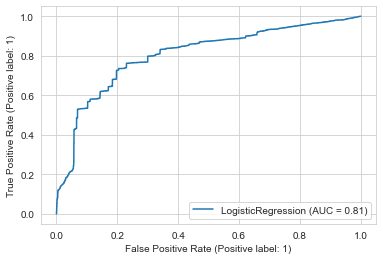

In [106]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log, X_test, y_test) 
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

